In [ ]:
from torchvision.datasets import MNIST
import torch
import numpy as np
train_data = MNIST(root='/content/', train=True, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 147995768.42it/s]


Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 78253032.19it/s]


Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41960268.15it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 6373545.92it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



# Question 1 : **Principal Component Analysis**


---
## **Vanilla Principal Component Analysis**
---

### Main Function to Impliment Algorithm

#### Obtaining workable sized Dataset

We can see each Label (0-9) has random allocations from the original dataset


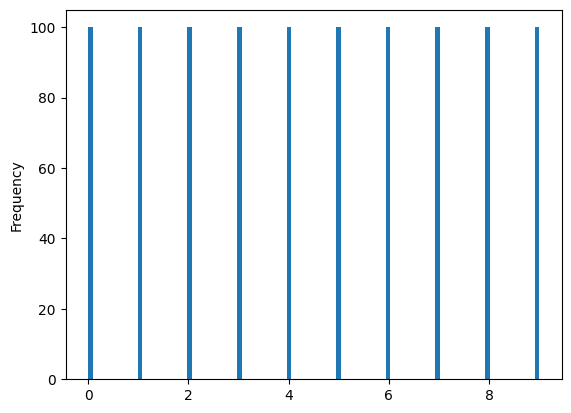

In [ ]:
x = train_data.data.numpy()
X_train = x.reshape(x.shape[0], -1)   #flattening all features
y_train = train_data.targets.numpy()

data = np.zeros((1000,784))
dy = np.zeros(1000)

for i in range(10):
  t = 0
  j = 0
  while j < 100:
    if y_train[t] == i:
      data[i*100+j] = X_train[t]
      dy[i*100+j] = y_train[t]
      j+=1

    t+=1                                # all labels have random 100 pictures each

import pandas as pd
df = pd.DataFrame(dy)

from matplotlib import pyplot as plt
df[0].plot(kind='hist', bins=100, title=0)

print("We can see each Label (0-9) has random allocations from the original dataset")

#### Centering Dataset

In [ ]:
center = np.mean(data, axis = 0)    # meu_1
x_c = data - center                 # Centered Dataset
#x_c = x_c.T

C = np.cov(x_c.T) #Covariance Matrix
C

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Function:   **Eigen Decomposer**

In [ ]:
#Using linalg function to calculate the eigen vectors and the eigen values of the data point
def eigen_decompose(M):
  v, w = np.linalg.eig(M)
  id = v.argsort()[::-1]

  v = v[id]
  w = w[:,id]

  return v,w

#### Function:   **Looking at only the top k dimensions or top k components**

In [ ]:
λ, w = eigen_decompose(C)
def reconstructed(k):
  w_k = w[:,0:k]
  P = w_k @ w_k.T
  new_data = P @ x_c.T
  new_data = ((new_data.T + center).T).real

  return new_data

### Observation and Results

#### Plotting the Principal Components individually

In [ ]:
plt.figure(figsize=(8, 6))

def imager(ki,ko,d = 1):
  r=2
  plt.figure(figsize=(8, 6))
  for i in range(ki,ko,d):
    plt.subplot(r,5,i+1)
    plt.imshow(w[:,i].real.reshape((28,28)), cmap = 'gray')
    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.title("ω%d" %(i+1))
  plt.show()
  plt.figure(figsize=(8, 6))

  for i in range(ki,ko,d):
    plt.subplot(r+1,5,i+1)
    plt.imshow(w[:,i].real.reshape((28,28)), cmap = 'PiYG')
    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    #plt.title("ω%d" %(i+1))
  plt.show()
  plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

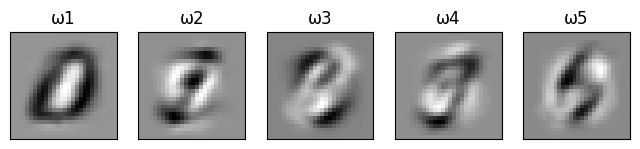

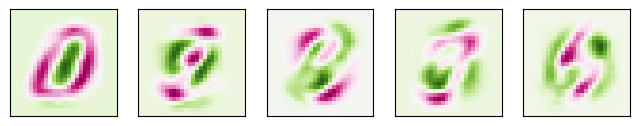

<Figure size 800x600 with 0 Axes>

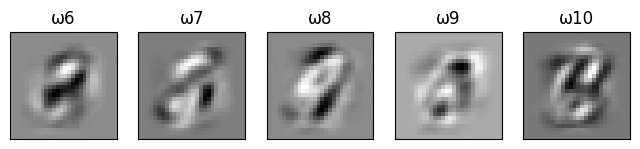

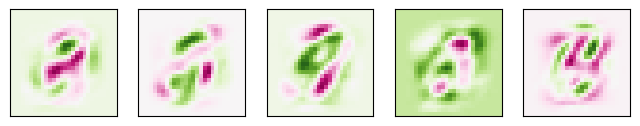

<Figure size 800x600 with 0 Axes>

In [ ]:
imager(0,5)
imager(5,10)

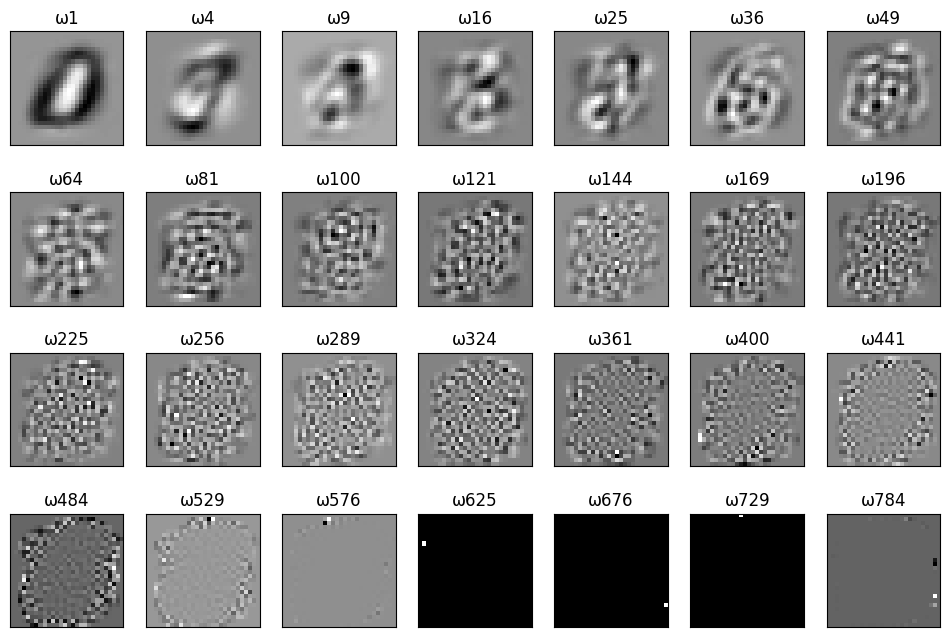

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(1,29):
  plt.subplot(4,7,i)
  plt.imshow(w[:,i*i-1].real.reshape((28,28)), cmap = 'gray')
  plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
  plt.title("ω%d" %(i*i))
plt.show()
plt.figure(figsize=(8, 8))


#### Plotting the New Image with top d Components

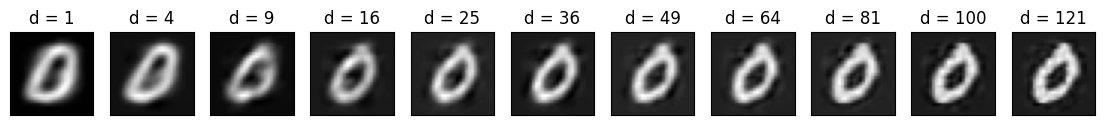

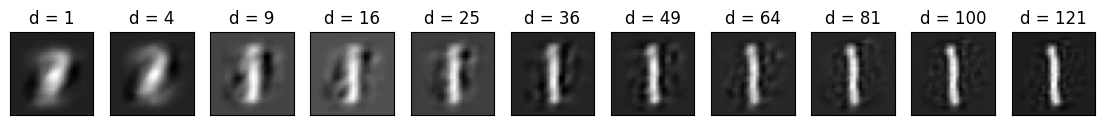

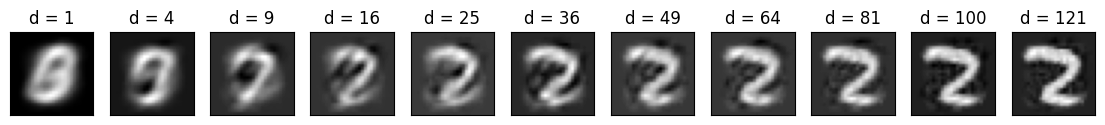

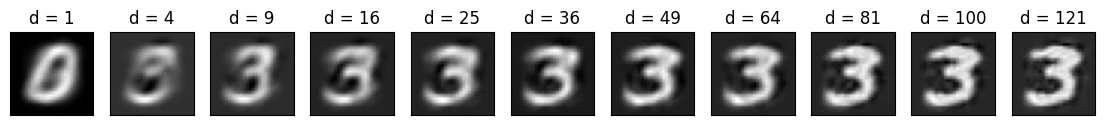

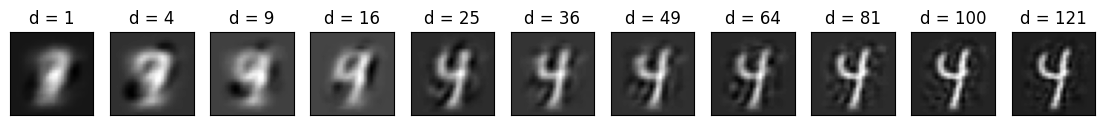

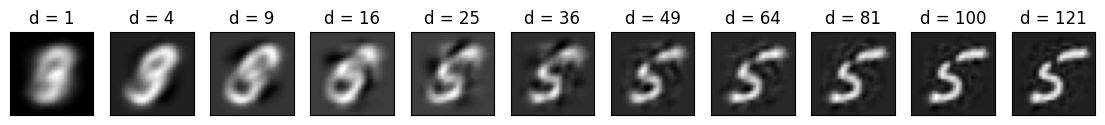

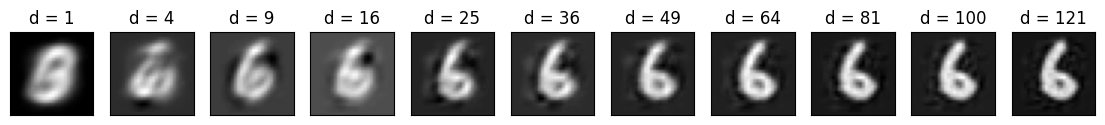

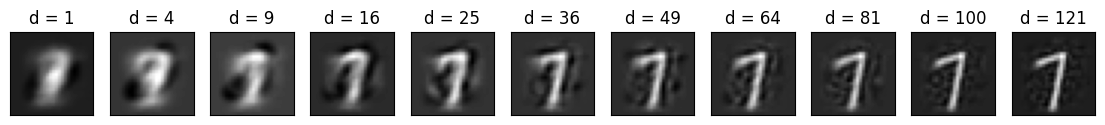

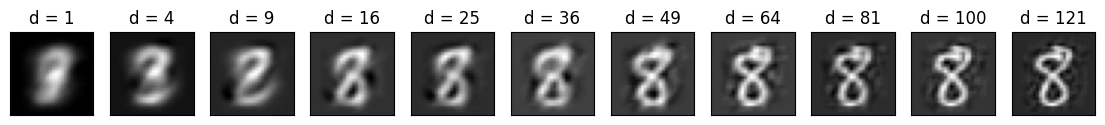

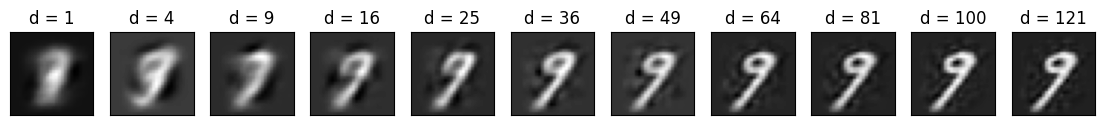

In [ ]:
#Reconstructing a random point from each label
for j in range(10):
  plt.figure(figsize=(14, 10))
  for i in range(11):
    new_img = reconstructed((i+1)*(i+1))
    plt.subplot(1,11,i+1)

    plt.imshow(new_img[:,100*j+3].reshape((28,28)), cmap = "gray")
    plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    plt.title("d = %d" %((i+1)*(i+1)))
  #plt.show()


#### Plotting Eigen values to gauge the Cumulative importance of top 'i' Eigen vectors

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Percentage')

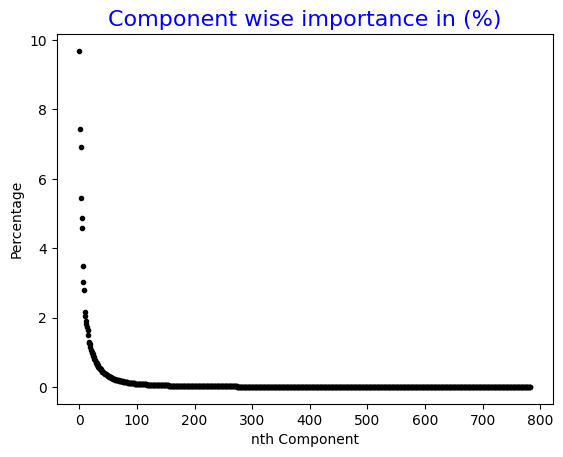

In [ ]:
import seaborn as sns
plt.plot(100*λ/np.sum(λ), '.', color = "black")
plt.title("Component wise importance in (%)", fontsize=16, color='blue', ha='center')
plt.xlabel("nth Component")
plt.ylabel("Percentage") # Percentage of non repeated Informtion captured by PCA


<ipython-input-11-3597ca69b29c>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  s[0] = λ[0]
<ipython-input-11-3597ca69b29c>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  s[i] = s[i-1] + λ[i]
<ipython-input-11-3597ca69b29c>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  s[0] = λ[0]


Text(0, 0.5, 'Percentage')

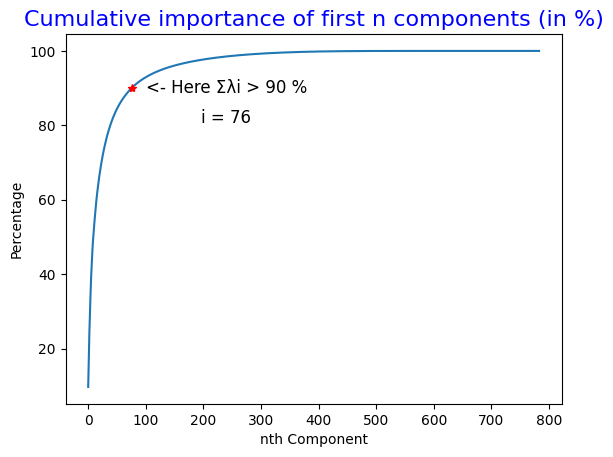

In [ ]:
s = np.zeros(784)
s[0] = λ[0]
for i in range(1,784):
  s[i] = s[i-1] + λ[i]
s = 100*s/s[783]


import seaborn as sns
plt.plot(s)
plt.plot(76, s[76], '*', color = 'r')
s[0] = λ[0]
plt.text(240, 90, "<- Here Σλi > 90 %", ha='center', va='center', fontsize=12)
plt.text(240, 82, "i = 76", ha='center', va='center', fontsize=12)
plt.title("Cumulative importance of first n components (in %)", fontsize=16, color='blue', ha='center')
plt.xlabel("nth Component")
plt.ylabel("Percentage")

---
## **Kernel Principal Component Analysis**
---

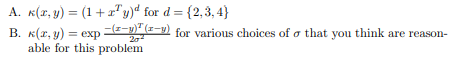

### Main Program to Impliment Algorithm

### Function: **The Polynomial Kernel Function**

In [ ]:
def polynomial_kernel(Map, d):
  n = Map.shape[1]
  one = (1/n)*np.ones((n,n))
  K = np.zeros((n,n))
  for i in range(n):         # Making the Kernel matrix K
    for j in range(i,n):
      x = Map[:, i]
      y = Map[:, j]
      K[i][j] = (1 + x.dot(y))**d   #  equations of K1
      K[j][i] = (1 + x.dot(y))**d   #  equations of K2

  K_polynomial = K - one.dot(K) - K.dot(one) + one.dot(K).dot(one)
  return K_polynomial


In [ ]:
comp = 2   # The top 2 components are shown
def pk_plot(d,clrr,col,dots = 15):
  xnorm = x_c.T / np.linalg.norm(x_c.T, axis = 0)
  K = polynomial_kernel(xnorm, d)
  λ, wc = eigen_decompose(K)
  w = wc[:, :comp]

  X_kpca = K @ w
  X_kpca = X_kpca.real          # weed out some minute values of imaginary numbers

  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], color = clrr, s= dots)

  if col == 1:
    labels = ['d = 2 (Magenta)', 'd = 3 (Blue)','d = 4 (green)', 'd = 5 (Red)','d = 6(Cyan)','d = 7(black)' ]  # Custom labels
    #'m': ' Word', 'b': 'Blue Word', 'g': 'Green Word',
    #      'r': 'Red Word', 'c': 'Cyan Word', 'w': 'White Word'
    plt.legend(labels=labels)

  else:
    labels = ['d ='+ str(d)] # Custom labels
    plt.legend(labels=labels)

  plt.xlabel('KPC 1')
  plt.ylabel('KPC 2')



### Function: **The Radial basis Kernel Function**

In [ ]:
def kernelb(Map, σ):
  n = Map.shape[1]
  #print(n)
  rbf = np.zeros((n,n))
  one = (1/n)*np.ones((n,n))

  for i in range(n):
    for j in range(i,n):     #symmetric
      xval = Map[:,i]
      yval = Map[:,j]
      rbf[i][j] = (np.linalg.norm(xval - yval))**2
      rbf[j][i] = rbf[i][j]

  K  = np.exp(-rbf/(σ))
  K = K - one.dot(K) - K.dot(one) + one.dot(K).dot(one)
  return K

In [ ]:
σ=7      # sigma allocator
def rbf_plotter(σ=7):
  xn = x_c.T / np.linalg.norm(x_c.T, axis = 0)
  K = kernelb(xn, σ)
  eigv, eigvect = eigen_decompose(K)
  w = eigvect[:, :2]
  σ_pca = K @ w
  σ_pca = σ_pca.real     #  weed out some minute values of imaginary numbers

  return σ_pca

### Observations and Plotting

#### Principal Coponent Analysis using Polynomial Kernel functions

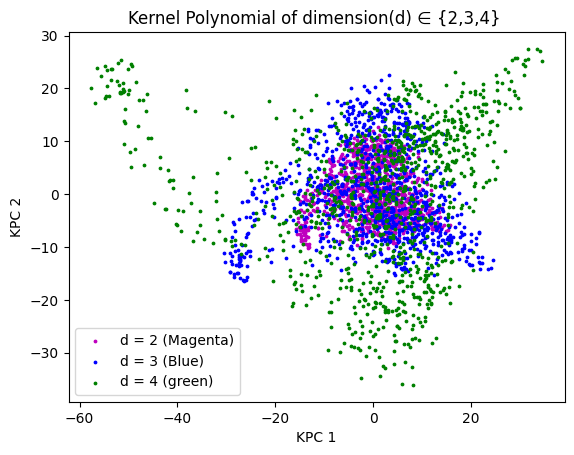

In [ ]:
clrr = ['m','b','g','r','c','k']

for i in range(2,5):
  pk_plot(i, clrr[i-2],1,3)

plt.title("Kernel Polynomial of dimension(d) ∈ {2,3,4} ")
plt.show()

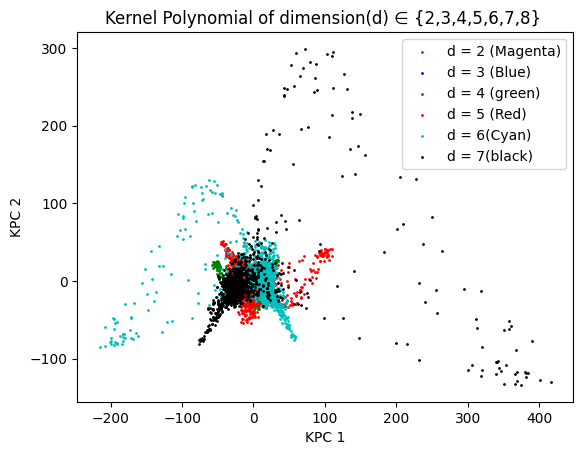

In [ ]:
clrr = ['m','b','g','r','c','k']

for i in range(2,8):
  pk_plot(i, clrr[i-2],1,1)

plt.title("Kernel Polynomial of dimension(d) ∈ {2,3,4,5,6,7,8} ")
plt.show()

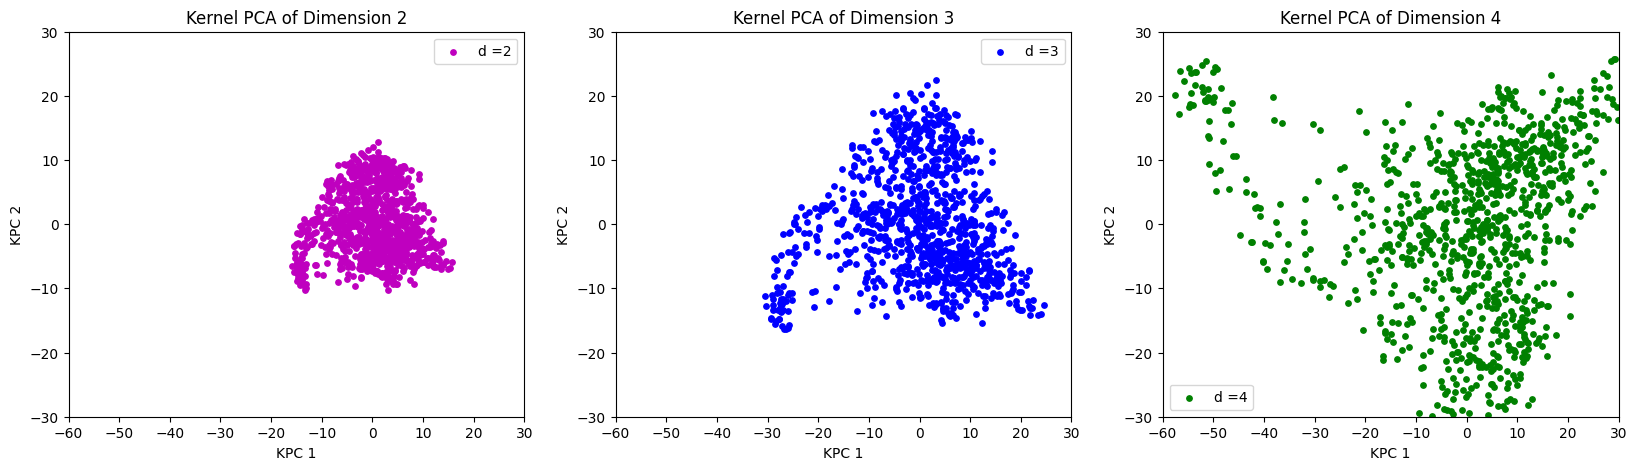

In [ ]:
plt.figure(figsize=(20, 5))
for i in range(2,5):

  plt.subplot(1,3 ,i-1)
  plt.xlim(-60, 30)
  plt.ylim(-30, 30)
  s  = 'd' + str(i)
  pk_plot(i, clrr[i-2], 2 )
  plt.title('Kernel PCA of Dimension ' + str(i))

#### Principal Component Analysis using Radial Kernel Function

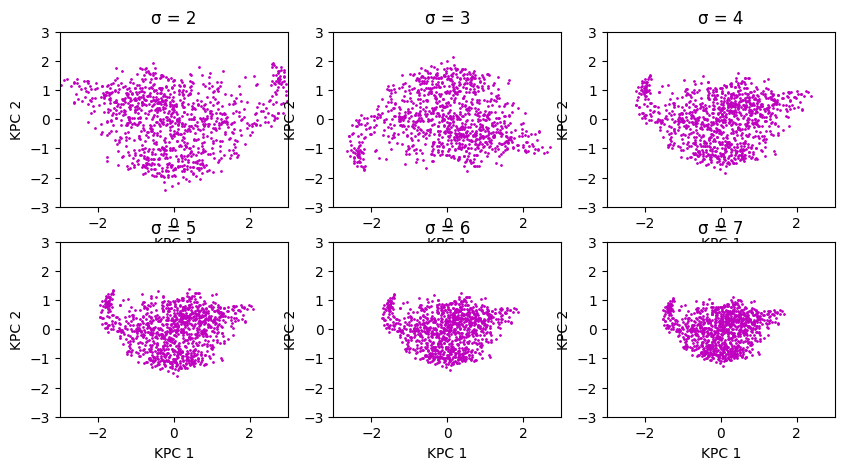

In [ ]:
plt.figure(figsize=(10, 5))
for sigs in range(2,8):
  result = rbf_plotter(sigs)

  for i in range(1000):
    plt.subplot(2,3 ,sigs-1)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)

    plt.scatter(result[i, 0], result[i, 1], c = 'm',s = 1)
  plt.xlabel('KPC 1')
  plt.ylabel('KPC 2')
  plt.title('σ = '+ str(sigs))
